In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import joblib
from astropy.table import Table
from scipy import stats

In [2]:
fname_template2023 = '../bfoscE9G10/template/template_from_202305220046.z'
Tdata2023 = joblib.load(fname_template2023)
fname_template = '../bfoscE9G10/template/fear_model_order2_12.dump'

Tdata = joblib.load(fname_template)

In [3]:
fname = '/Users/lijiao/Documents/works/Feige89/data/216cm/20240314_bfosc_liuzhicun/E9G10/dump/lamp-202403140107_SPECSLAMP_FeAr_slit16s_G10_E9.fit_for_202403140104_SPECSTARGET_Feige89_slit16s_G10_E9.fit.z'

data = joblib.load(fname)

In [4]:
tab_linelist =  Table.read('../arc_linelist/FeAr.dat', format='ascii')

In [5]:
fname = '../wvcalib/test/lamp-202403140107_SPECSLAMP_FeAr_slit16s_G10_E9_manually.z'

data = joblib.load(fname)
tab_linelist_forE9G10 = data['tab_lines']

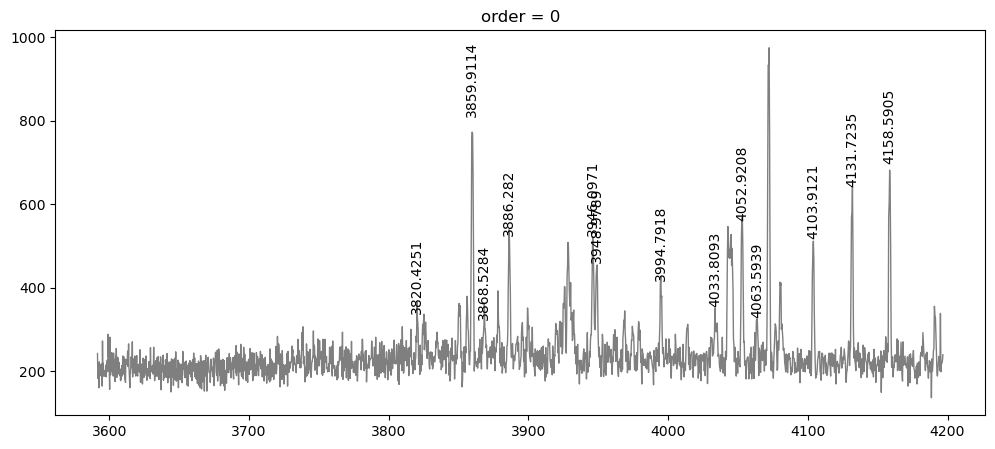

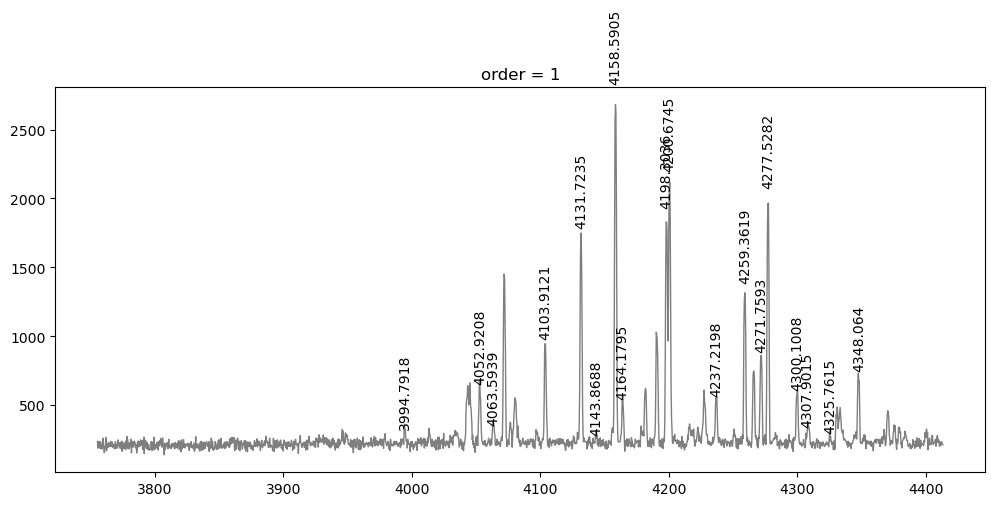

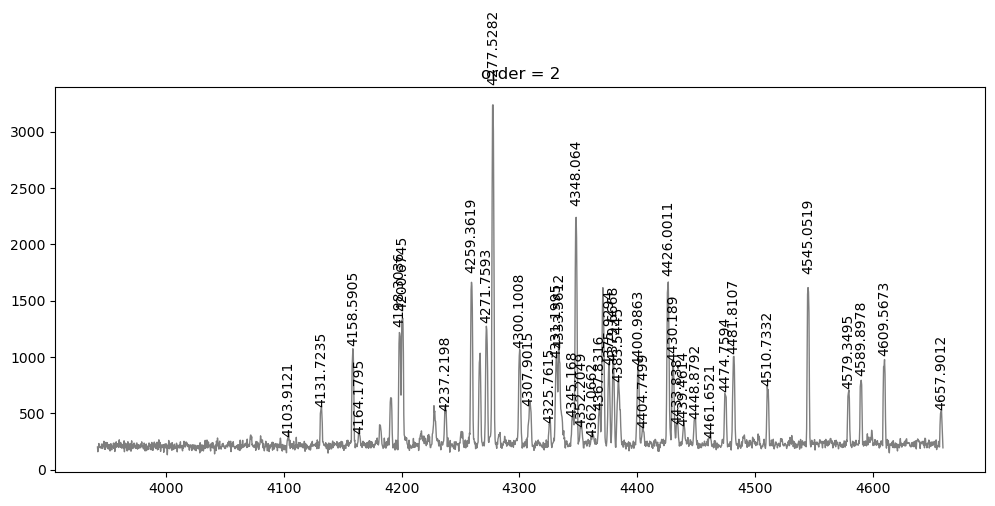

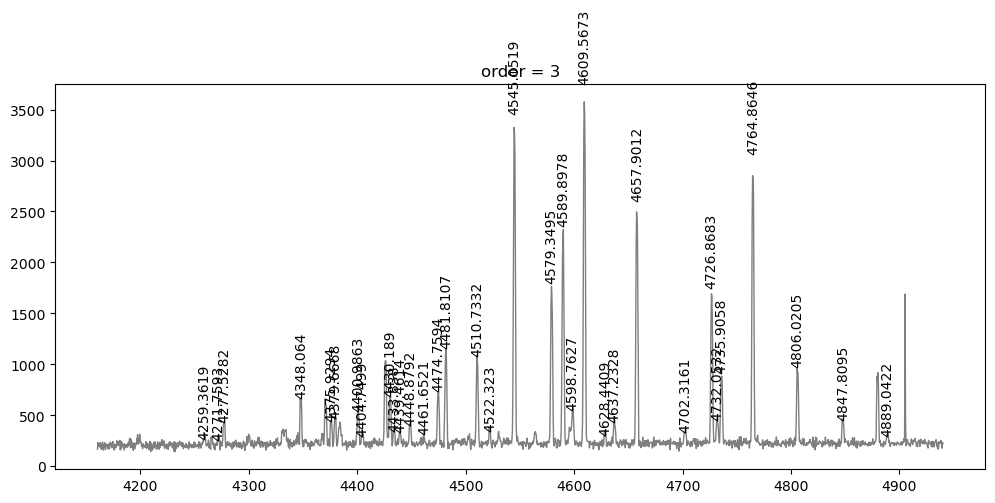

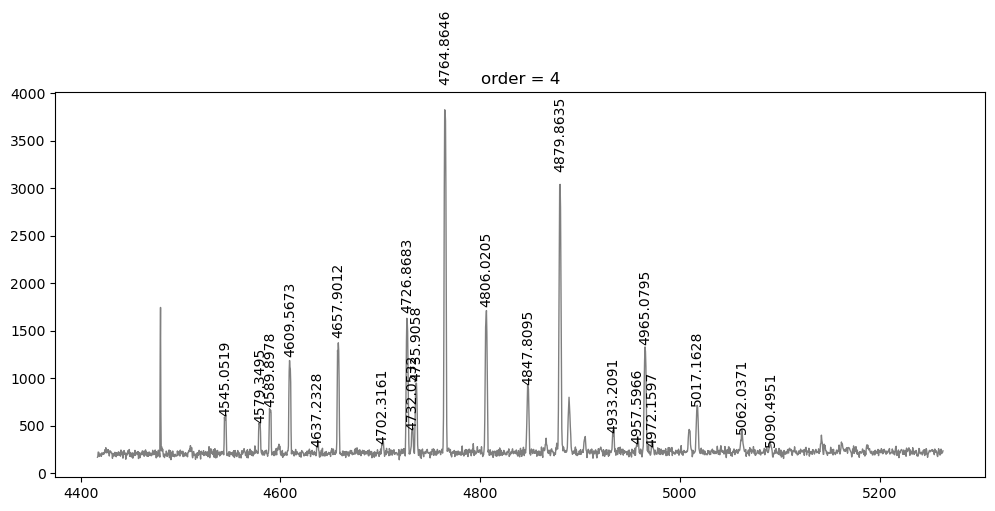

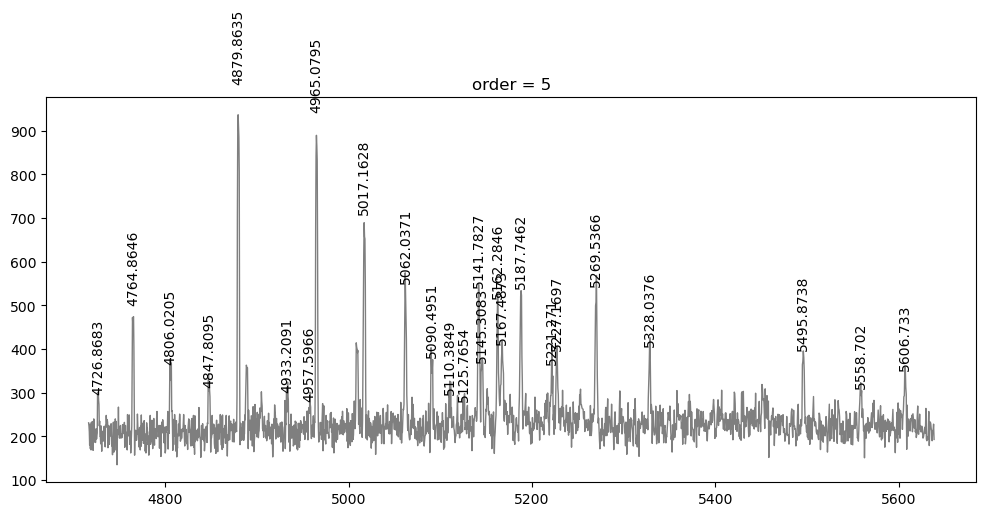

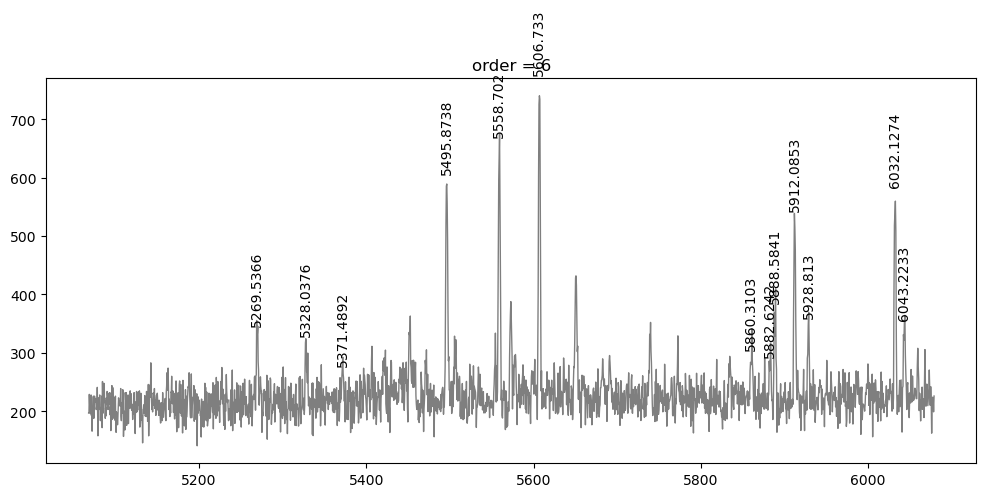

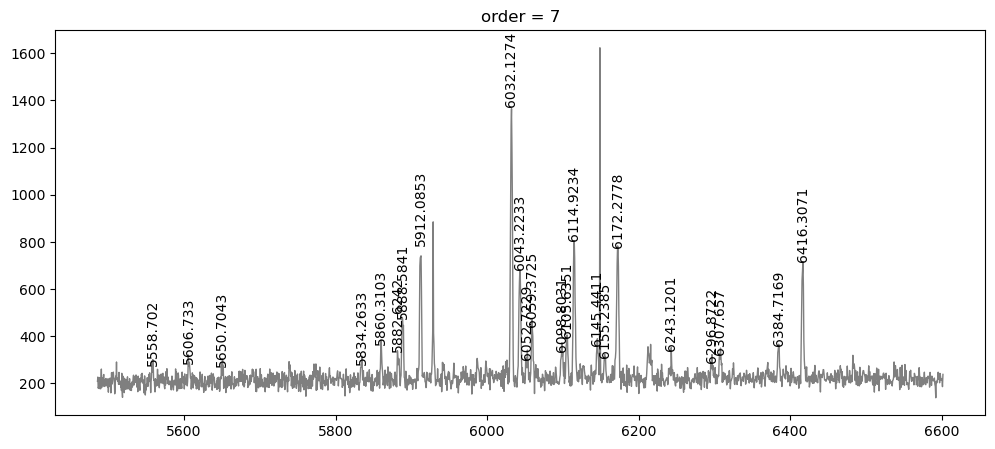

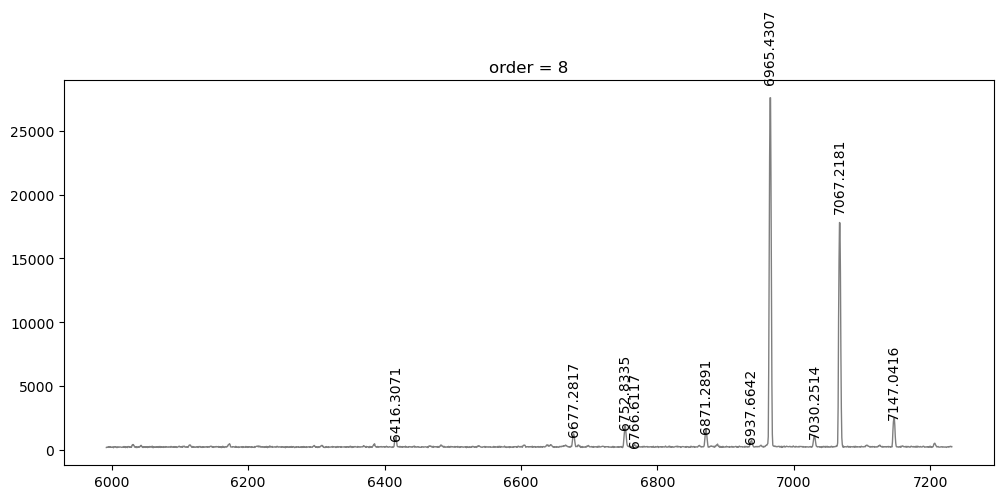

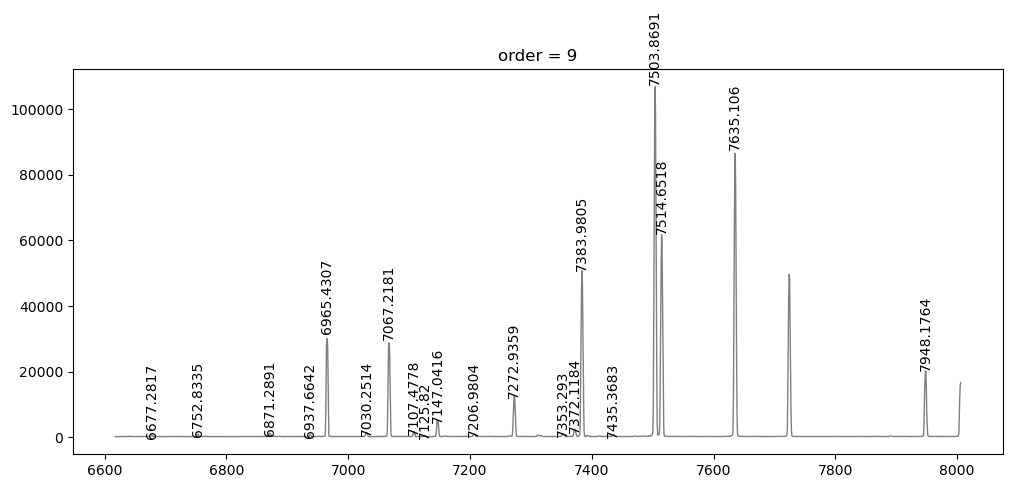

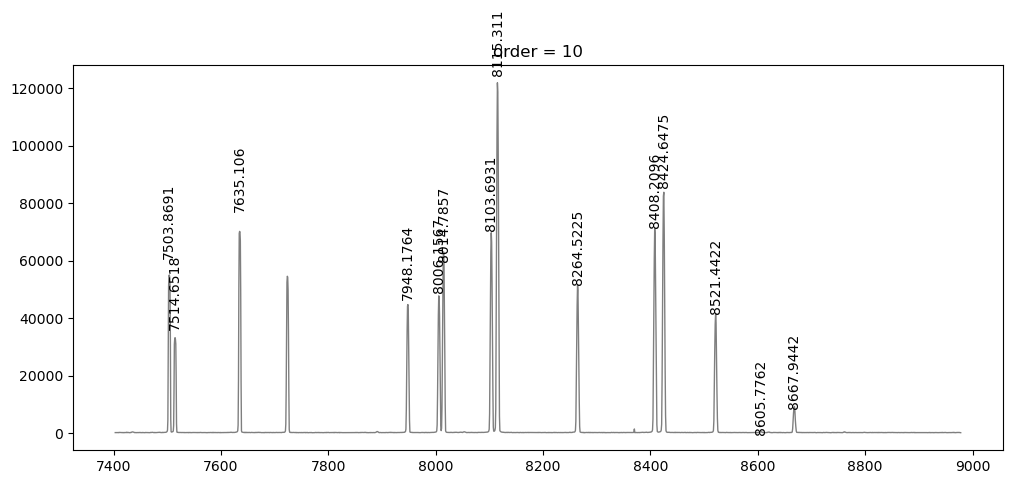

In [31]:
%matplotlib inline

for order in np.arange(11)[0:12]:
    fig, ax = plt.subplots(1,1, figsize=(12, 5))
    plt.title(f'order = {order}')
    x = data['flux_arc'][order]
    wv = data['wave_solu'][order]
    _x = (x- np.min(x))/(np.max(x) - np.min(x))
    plt.plot(wv, x, color='k', lw=1, alpha=0.5)
    _ind = data['tab_lines']['order'] == order
    _tab = data['tab_lines'][_ind]
    _line = 0
    for _itab in _tab:
        if _itab["line"] != _line: 
            plt.text(_itab["line"], _itab['Fpeak'], f'{_itab["line"]}', rotation=90, ha='center')
            _line = _itab["line"]
plt.show()

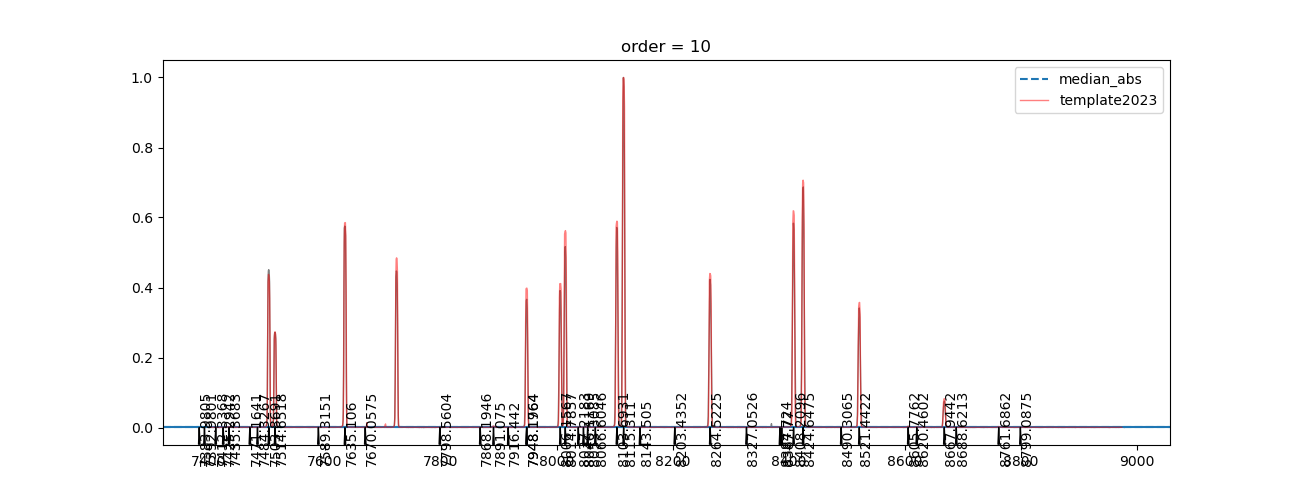

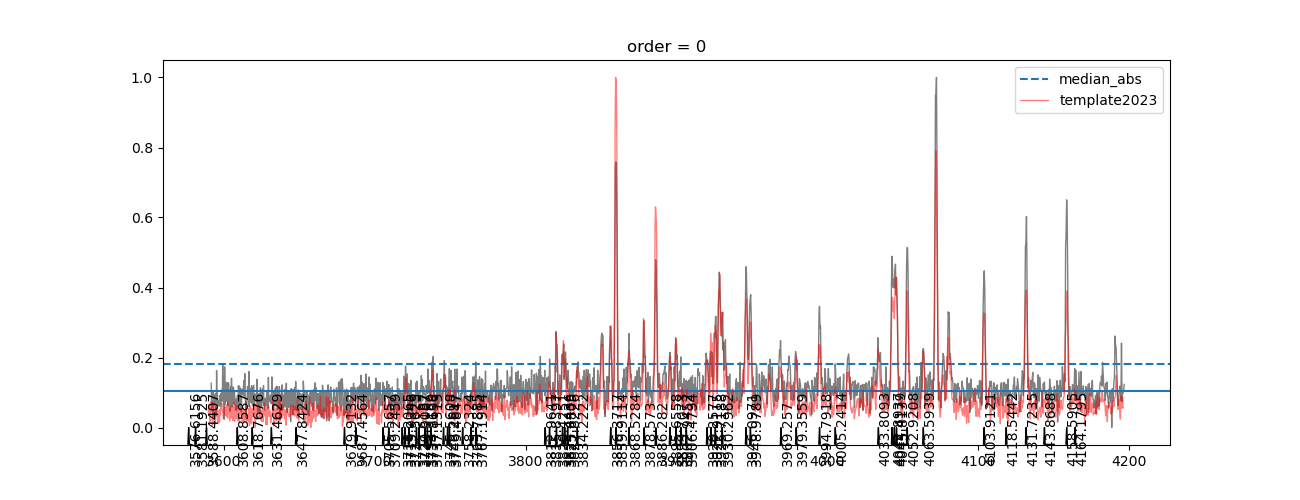

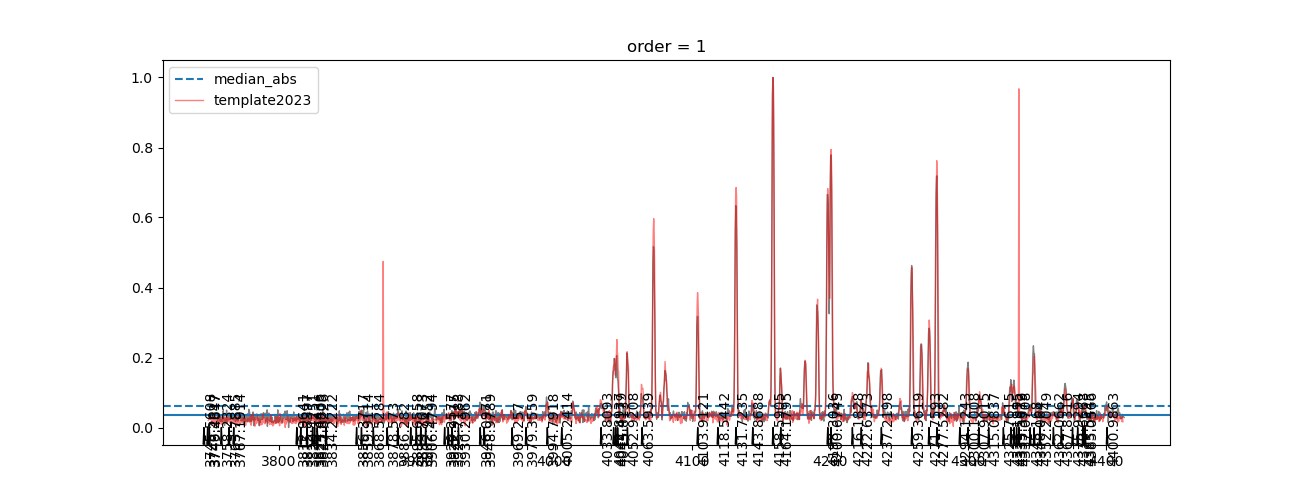

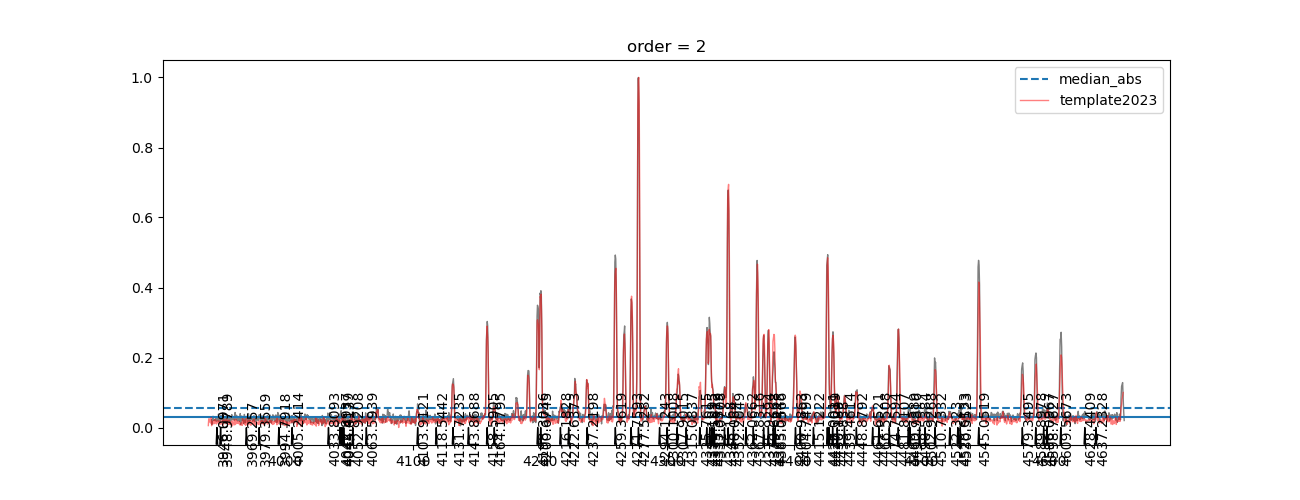

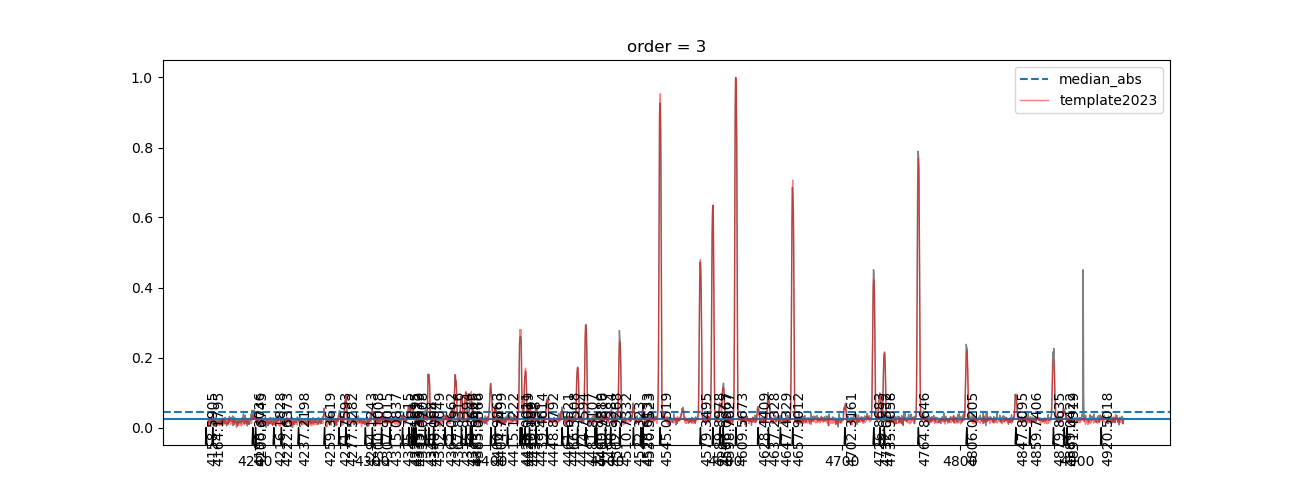

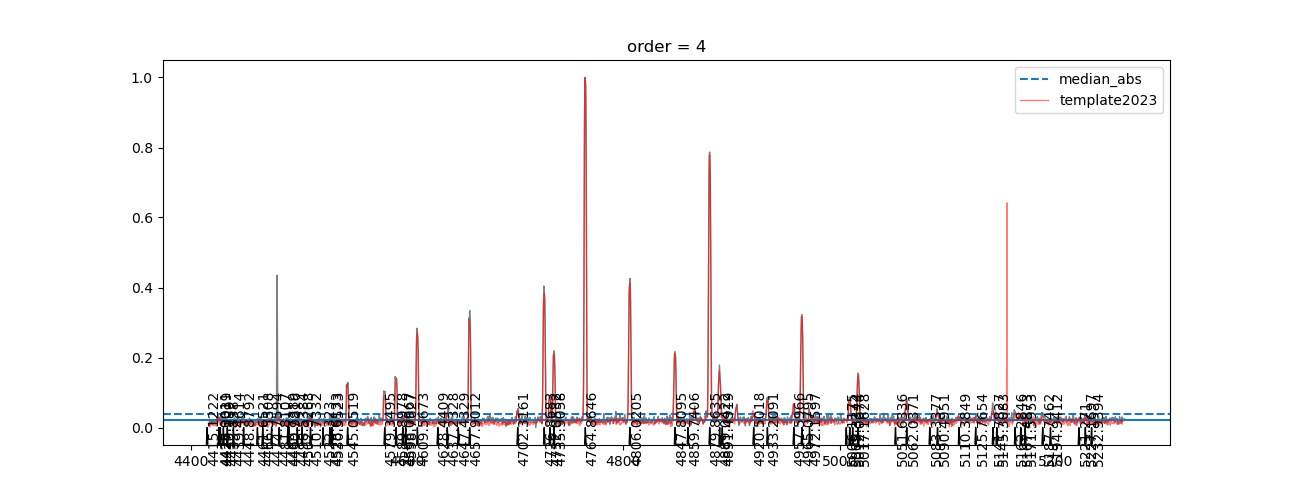

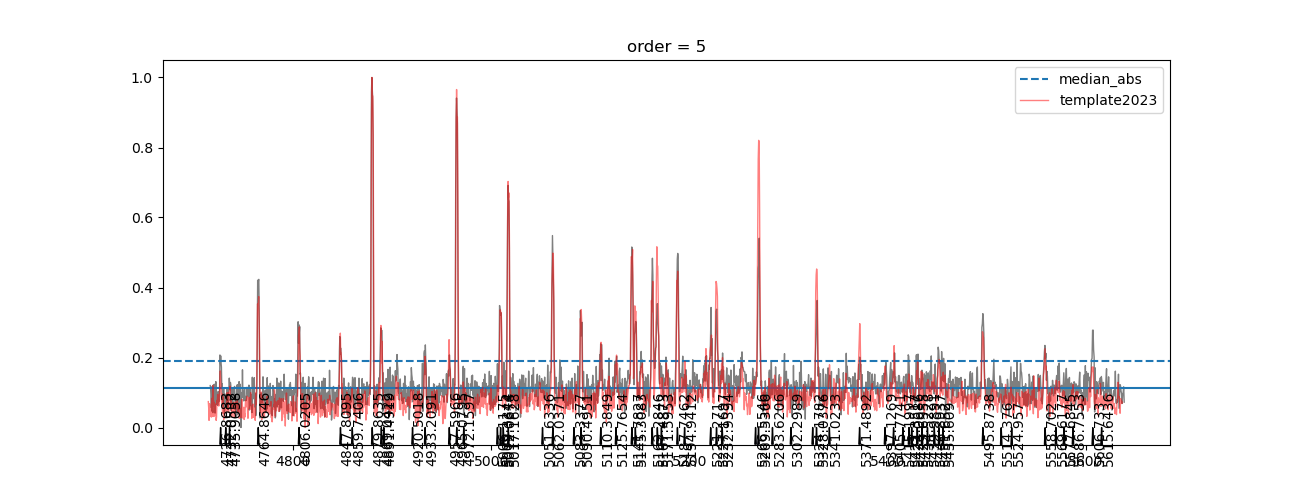

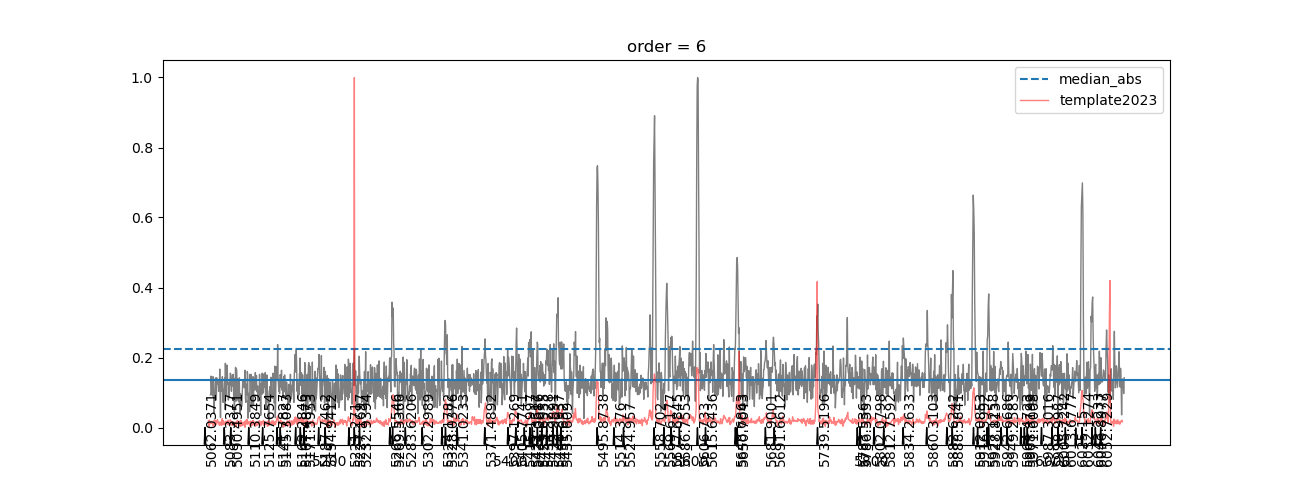

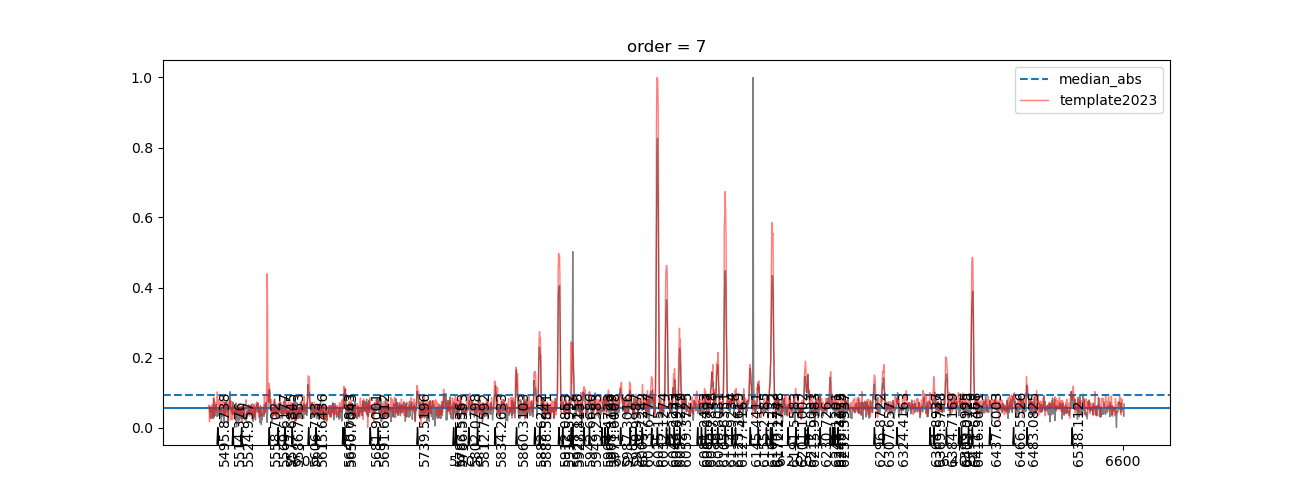

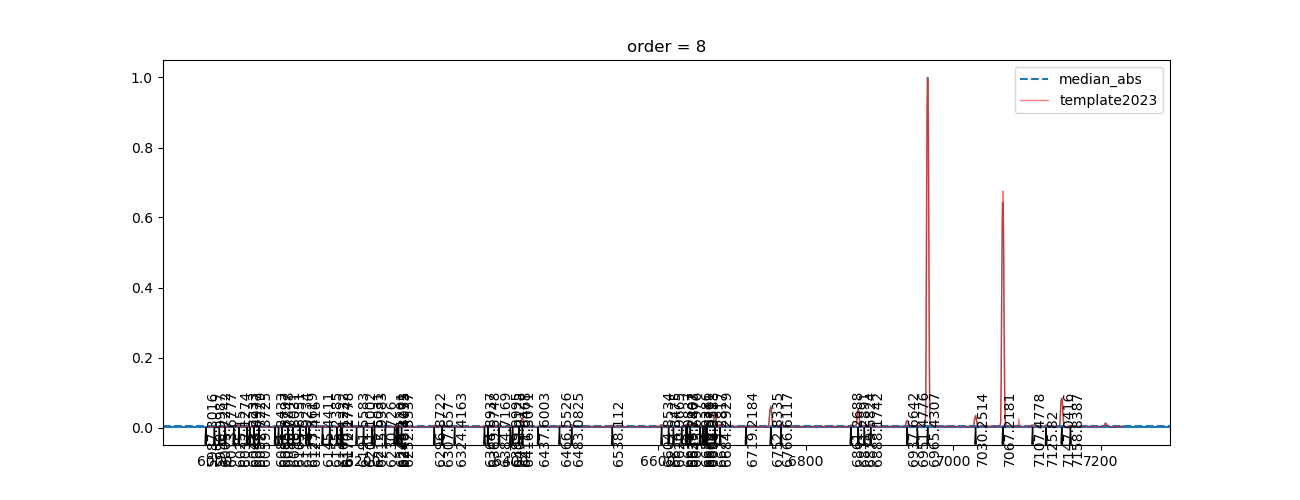

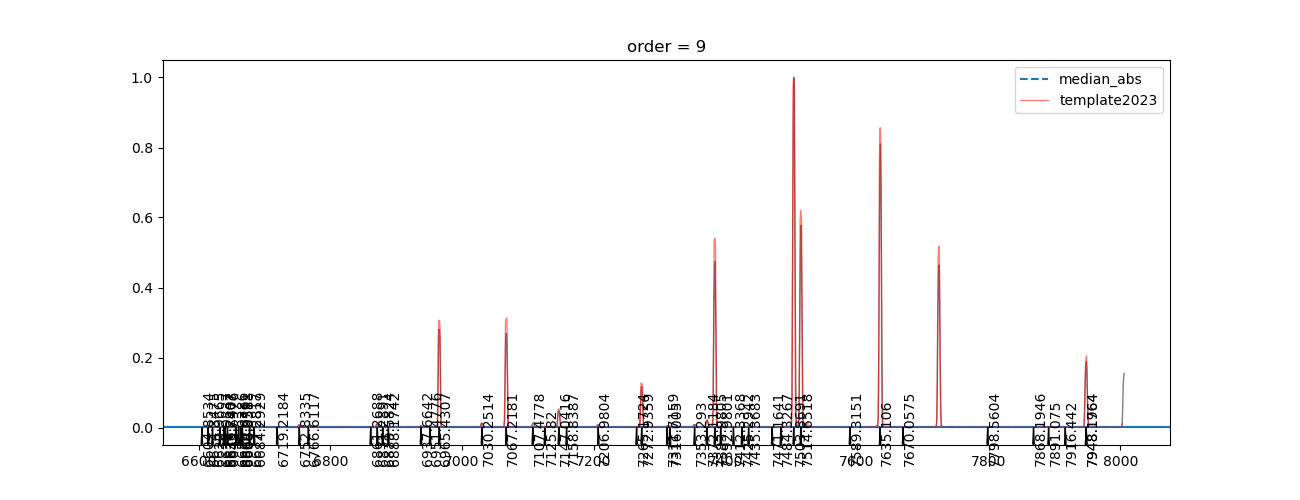

In [29]:
%matplotlib widget


for order in np.arange(11)[0:12]:
    fig, ax = plt.subplots(1,1, figsize=(13, 5))
    plt.title(f'order = {order}')
    x = data['flux_arc'][order]
    wv = data['wave_solu'][order]
    _x = (x- np.min(x))/(np.max(x) - np.min(x))
    plt.plot(wv, _x, color='k', lw=1, alpha=0.5)
    plt.axhline(y = np.median(_x))
    #plt.axhline(y = np.median(_x)+ np.std(_x), label='std')
    plt.axhline(y = np.median(_x)+ 3*stats.median_abs_deviation(_x), label='median_abs', ls = '--')
    x = Tdata['flux'][order]
    #x[x>4000] = np.nan
    wv = Tdata['wave'][order]
    #plt.plot(wv, (x- np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)),  color='b', lw=1, alpha=0.5, label='template')
    _ind = (np.min(wv) <= tab_linelist['wavelength']) &  (tab_linelist['wavelength'] <= np.max(wv))
    _linelist = tab_linelist[_ind]['wavelength'].value
    for _line in _linelist:
        ax.annotate(f'{_line}', xy=(_line, 0), xytext=(_line, -0.1), rotation=90,
                     arrowprops=dict(facecolor='b', shrink=0.05, width=1, headwidth=1),)
    wv = Tdata2023['wave_solu'][order]
    x = Tdata2023['flux'][order]
    plt.plot(wv, (x- np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)),  color='r', lw=1, alpha=0.5, label='template2023')
    plt.legend()
plt.show()

In [29]:
import os
os.path.splitext('dddd.ddd.ddd')

('dddd.ddd', '.ddd')

In [7]:
_line = 3000
plt.Annotation(f'{_line}', xy=(_line, 0), xytext=(_line, 0),
                     arrowprops=dict(facecolor='b', shrink=0.05),)

Text(3000, 0, '3000')

In [8]:
np.max(Tdata['flux'][order])

228.5517

In [9]:
#data['wave_init'] = Tdata['wave']
#data['wave_solu'] = Tdata['wave']
#joblib.dump(data, fname)

# make E9G10 template

In [13]:
data_template = {'wave' : data['wave_solu'],
                 'flux' : data['flux_arc'],
                 'linelist' : Tdata['linelist']
                }

#joblib.dump(data_template, '../bfoscE9G10/template/fear_model_order2_12_from202403140107.dump')

![bfosc_gui.png](attachment:656fe4f9-bd39-4e07-8d5c-75c7f3acecee.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import joblib
from astropy.table import Table
from pyexspec.wavecalibrate.findlines import *

In [2]:
from pyexspec.wavecalibrate.findlines import find_lines

In [3]:
from pyexspec.wavecalibrate.findlines import findline

In [4]:
template = joblib.load('../bfoscE9G10/template/fear_model_order2_12_from202403140107.dump')

sample = joblib.load('../bfoscE9G10/template/template_order2_12_from_202305220046.dump')


sample = joblib.load('../bfoscE9G10/template/fear_model_order2_12_from202403140107.dump')

In [5]:
#template['flux'].shape[1], shifts.shape

In [6]:
_order = 10
find_line = findline()
xcoord = np.arange(sample['flux'].shape[1])
waves_template, fluxes_template = template['wave'], template['flux']
waves_sample, fluxes = sample['wave'], sample['flux']
flux = fluxes[_order]
flux_template = fluxes_template[_order]
wave_template = waves_template[_order]
x_template = np.arange(template['flux'].shape[1])
shifts, ccf = find_line.calCCF(xcoord, flux, x_template, flux_template, show=False)

wave_init = find_line.estimate_wave_init(xcoord, find_line.xshift, x_template, wave_template) 
#fig, ax = plt.subplots(figsize = (10,6))
#
#plt.plot(xcoord, flux_template)
#plt.plot(shifts, flux)

  |-@grating_equation: iter-1 	24 lines kicked, 2024 lines left, rms=0.00000 A
  |-@grating_equation: iter-2 	67 lines kicked, 1957 lines left, rms=0.00000 A
  |-@grating_equation: iter-3 	71 lines kicked, 1886 lines left, rms=0.00001 A
  |-@grating_equation: iter-4 	61 lines kicked, 1825 lines left, rms=0.00000 A
  |-@grating_equation: iter-5 	41 lines kicked, 1784 lines left, rms=0.00000 A
  |-@grating_equation: iter-6 	21 lines kicked, 1763 lines left, rms=0.00000 A
  |-@grating_equation: iter-7 	70 lines kicked, 1693 lines left, rms=0.00001 A
  |-@grating_equation: iter-8 	29 lines kicked, 1664 lines left, rms=0.00000 A
  |-@grating_equation: iter-9 	85 lines kicked, 1579 lines left, rms=0.00002 A
  |-@grating_equation: iter-10 	77 lines kicked, 1502 lines left, rms=0.00002 A
  |-@grating_equation: 10 iterations, rms = 0.00000 A


In [24]:
waves_template

array([[3591.55854152, 3591.76801321, 3591.9776187 , ..., 4196.01470373,
        4196.37475019, 4196.73486685],
       [3755.23912125, 3755.47986133, 3755.72072511, ..., 4412.65417479,
        4413.0415524 , 4413.42901006],
       [3941.89243777, 3942.17918044, 3942.4659891 , ..., 4658.60497343,
        4659.01839438, 4659.43187887],
       ...,
       [5992.08164841, 5992.59992186, 5993.11826432, ..., 7230.26440627,
        7230.96006716, 7231.65580556],
       [6617.46795024, 6618.04532663, 6618.6227933 , ..., 8004.39577515,
        8005.17348764, 8005.95128622],
       [7403.0772702 , 7403.73120423, 7404.38525232, ..., 8976.20340664,
        8977.08894342, 8977.97459673]])

In [23]:
_order = 10
find_line = findline()
fluxes = sample['flux']
waves_init = np.zeros_like(fluxes)
xcoord = np.arange(fluxes.shape[1])
waves_template, fluxes_template = template['wave'], template['flux']
waves_sample = sample['flux']
for _order, flux in enumerate(fluxes):
    print(flux)
    flux_template = fluxes_template[_order]
    wave_template = waves_template[_order]
    x_template = np.arange(template['flux'].shape[1])
    shifts, ccf = find_line.calCCF(xcoord, flux, x_template, flux_template, show=False)
    wave_init = find_line.estimate_wave_init(xcoord, find_line.xshift, x_template, wave_template)
    waves_init[_order] = wave_init

    #fig, ax = plt.subplots(figsize = (10,6))
    #plt.title('Corrected wavelength')
    #plt.plot(wave_init, sample['flux'][_order])
    #plt.plot(template['wave'][_order], template['flux'][_order], label='template')
    #plt.legend()
    #plt.show()

NameError: name 'findline' is not defined

In [31]:
tab = Table.read('../arc_linelist/FeAr.dat', format='ascii') 

linelist = tab['wavelength']

waves_init, arc_obs, arc_line_list = waves_init, fluxes, np.array(linelist)
npix_chunk=10; ccf_kernel_width=1

tab_lines = find_lines(waves_init, fluxes, np.array(linelist), npix_chunk=20 , ccf_kernel_width=2)

/opt/anaconda3/lib/python3.11/site-packages/pyexspec/wavecalibrate/findlines.py:228: RuntimeWarning: invalid value encountered in divide
  return y / np.sum(y)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  |-find_lines: 628/712 lines using GF / CCF!


In [32]:
norder, npix = waves_init.shape
xcoord = np.arange(npix)

tlines = []
# for each order
for iorder in range(norder)[0:1]:
    # this order
    this_wave_init = waves_init[iorder]
    this_wave_min = np.min(this_wave_init)
    this_wave_max = np.max(this_wave_init)
    this_arc_obs = arc_obs[iorder]
    this_line_list = arc_line_list[np.logical_and(arc_line_list > this_wave_min, arc_line_list < this_wave_max)]    # for each line
    for this_line in this_line_list[-2:]:
        print(f'this_line = {this_line}')
        # init x position
        this_line_x_init = np.interp(this_line, this_wave_init, xcoord)
        this_line_x_init_int = int(this_line_x_init)  # np.argmin(np.abs((this_wave_init-this_line)))        # get a chunk
        if npix_chunk < this_line_x_init_int < npix - npix_chunk:
            this_line_slc = slice(this_line_x_init_int - npix_chunk, this_line_x_init_int + npix_chunk)
            this_line_xcoord = xcoord[this_line_slc]
            this_line_arc = this_arc_obs[this_line_slc]
            this_line_base = np.percentile(this_line_arc, q=20)  # 25th percentile as baseline
            # if this_line_base < 0:
            #     continue            # 1. Gaussian fit
            try:
                y = this_line_arc - this_line_base
                popt, pcov = curve_fit(gauss, this_line_xcoord, y,
                                       p0=[np.max(y)/2, this_line_x_init, 1.5], )
                # bounds=(np.array([0,-np.inf,1]), np.array([np.inf,np.inf,np.inf])))
                this_line_a_gf = popt[0]
                this_line_c_gf = popt[2]
                this_line_x_gf = popt[1]
                this_line_wave_init_gf = np.interp(popt[1], xcoord, this_wave_init)
            except:
                this_line_a_gf = np.nan
                this_line_c_gf = np.nan
                this_line_x_gf = np.nan
                this_line_wave_init_gf = np.nan
            # 2. CCF method
            #try:
            pccf = ccfmax(this_line_x_init, this_line_xcoord, this_line_arc, width=ccf_kernel_width, method="Nelder-Mead")
            this_line_x_ccf = np.float64(pccf.x)
            this_line_wave_init_ccf = np.interp(this_line_x_ccf, xcoord, this_wave_init)
            this_line_peakflux = np.interp(this_line_x_ccf, this_line_xcoord, this_line_arc)
            #except:
            #    this_line_x_ccf = np.nan
            #    this_line_wave_init_ccf = np.nan
            #    this_line_peakflux = np.nan            # gather results
            this_result = dict(
                order=iorder,
                line=this_line,
                line_x_init=this_line_x_init,
                # gf
                line_x_gf=this_line_x_gf,
                line_a_gf=this_line_a_gf,
                line_c_gf=this_line_c_gf,
                line_wave_init_gf=this_line_wave_init_gf,
                # ccf
                line_x_ccf=this_line_x_ccf,
                line_wave_init_ccf=this_line_wave_init_ccf,
                line_base=this_line_base,
                # peakflux
                line_peakflux=this_line_peakflux
            )
            # np.array([iorder, this_line_xcenter, this_line, line_wave_gf, line_wave_ccf,
            #           this_line_base, popt[0]/np.sqrt(2.*np.pi)/popt[2],
            #           *popt, np.float(pccf.x)]))
        tlines.append(this_result)
    tlines = Table(tlines)

this_line = 4158.5905
this_line = 4164.1795


/opt/anaconda3/lib/python3.11/site-packages/pyexspec/wavecalibrate/findlines.py:228: RuntimeWarning: invalid value encountered in divide
  return y / np.sum(y)
/var/folders/yf/txb0wkx177sd9_5sjpn5y65w0000gn/T/ipykernel_42833/1000522323.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  this_line_x_ccf = np.float64(pccf.x)


In [27]:
tlines

<Table length=2>
order    line      line_x_init     ... line_wave_init_ccf line_base   line_peakflux  
int64  float64       float64       ...      float64        float64       float64     
----- --------- ------------------ ... ------------------ --------- -----------------
    0 4158.5905  1940.000007293932 ...  4158.569118047644     210.0  677.153247680937
    0 4164.1795 1955.8133643295187 ...  4158.558156981994     209.8 674.6683498290004

In [35]:
this_line_x_ccf = np.nan

this_line_x_ccf != np.nan

True

In [25]:
this_line_x_init

1955.8133643295187

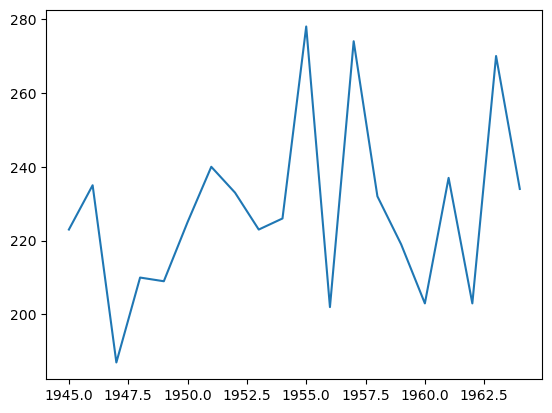

In [33]:
fig, ax = plt.subplots()

plt.plot(this_line_xcoord, this_line_arc)

In [21]:
find_line.estimate_wave_init(xcoord, find_line.xshift, x_template, wave_template)

  |-@grating_equation: iter-1 	24 lines kicked, 2024 lines left, rms=0.00000 A
  |-@grating_equation: iter-2 	67 lines kicked, 1957 lines left, rms=0.00000 A
  |-@grating_equation: iter-3 	71 lines kicked, 1886 lines left, rms=0.00001 A
  |-@grating_equation: iter-4 	61 lines kicked, 1825 lines left, rms=0.00000 A
  |-@grating_equation: iter-5 	41 lines kicked, 1784 lines left, rms=0.00000 A
  |-@grating_equation: iter-6 	21 lines kicked, 1763 lines left, rms=0.00000 A
  |-@grating_equation: iter-7 	70 lines kicked, 1693 lines left, rms=0.00001 A
  |-@grating_equation: iter-8 	29 lines kicked, 1664 lines left, rms=0.00000 A
  |-@grating_equation: iter-9 	85 lines kicked, 1579 lines left, rms=0.00002 A
  |-@grating_equation: iter-10 	77 lines kicked, 1502 lines left, rms=0.00002 A
  |-@grating_equation: 10 iterations, rms = 0.00000 A


array([7400.07064351, 7400.72405287, 7401.3775763 , ..., 8972.13145131,
       8973.01645218, 8973.90156955])

[243. 198. 183. ... 220. 226. 240.]
  |-@grating_equation: iter-1 	65 lines kicked, 1983 lines left, rms=0.00000 A
  |-@grating_equation: iter-2 	26 lines kicked, 1957 lines left, rms=0.00000 A
  |-@grating_equation: iter-3 	73 lines kicked, 1884 lines left, rms=0.00000 A
  |-@grating_equation: iter-4 	23 lines kicked, 1861 lines left, rms=0.00000 A
  |-@grating_equation: iter-5 	37 lines kicked, 1824 lines left, rms=0.00000 A
  |-@grating_equation: iter-6 	3 lines kicked, 1821 lines left, rms=0.00000 A
  |-@grating_equation: iter-7 	77 lines kicked, 1744 lines left, rms=0.00000 A
  |-@grating_equation: iter-8 	35 lines kicked, 1709 lines left, rms=0.00000 A
  |-@grating_equation: 8 iterations, rms = 0.00000 A
[236. 187. 203. ... 223. 215. 212.]
  |-@grating_equation: iter-1 	43 lines kicked, 2005 lines left, rms=0.00000 A
  |-@grating_equation: 1 iterations, rms = 0.00000 A
[200. 158. 185. ... 409. 274. 193.]
  |-@grating_equation: iter-1 	105 lines kicked, 1943 lines left, rms=0.0000

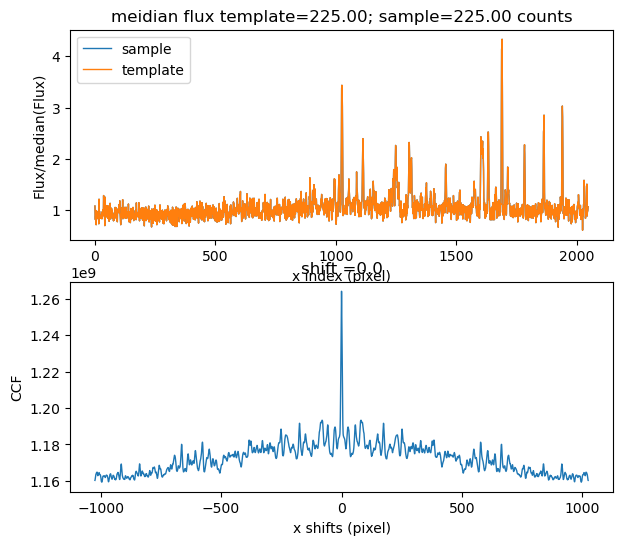

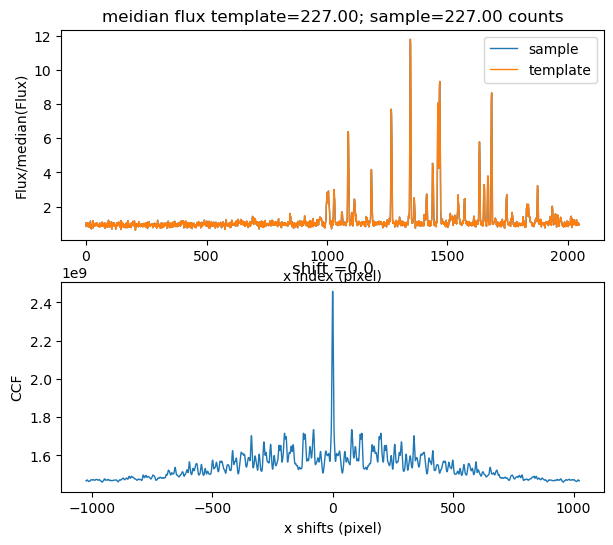

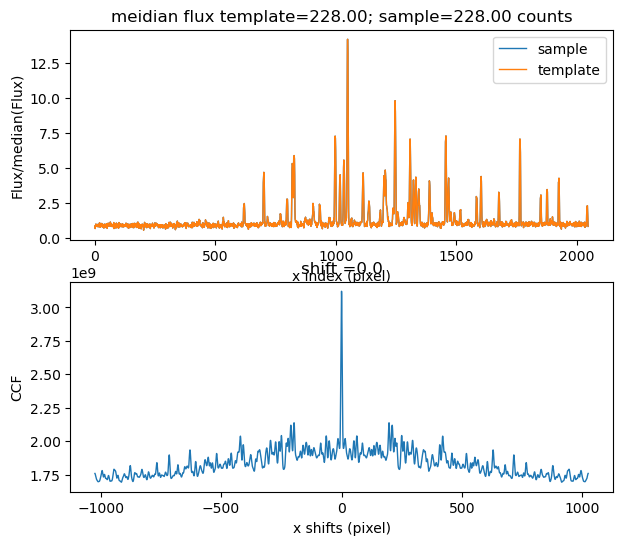

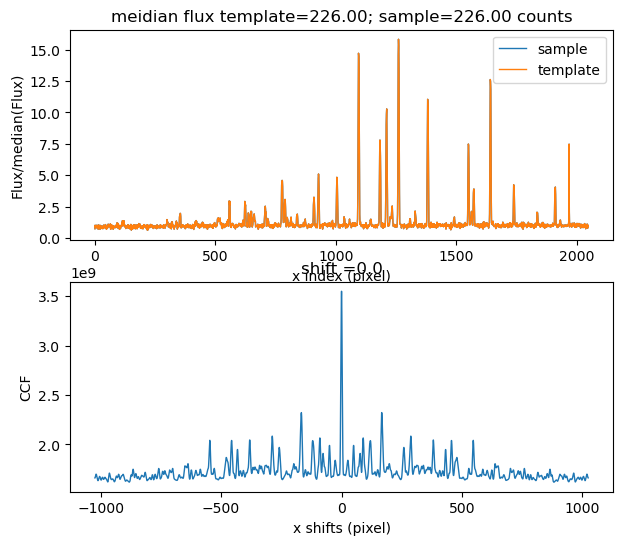

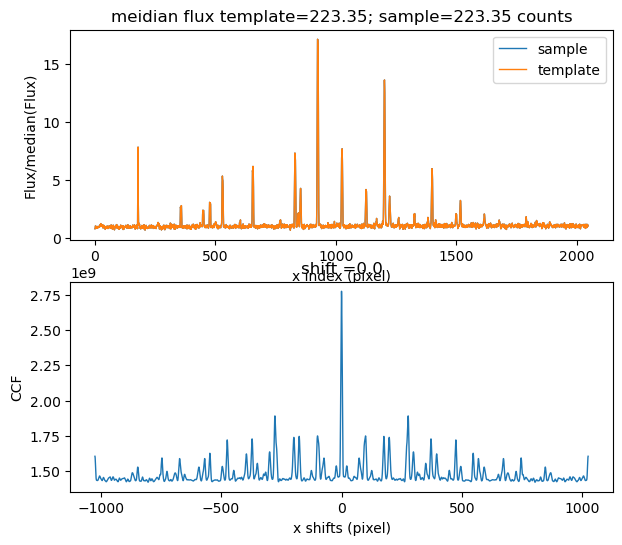

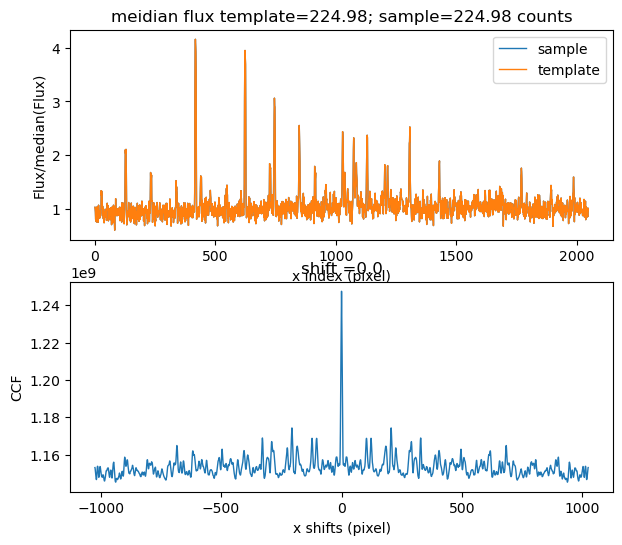

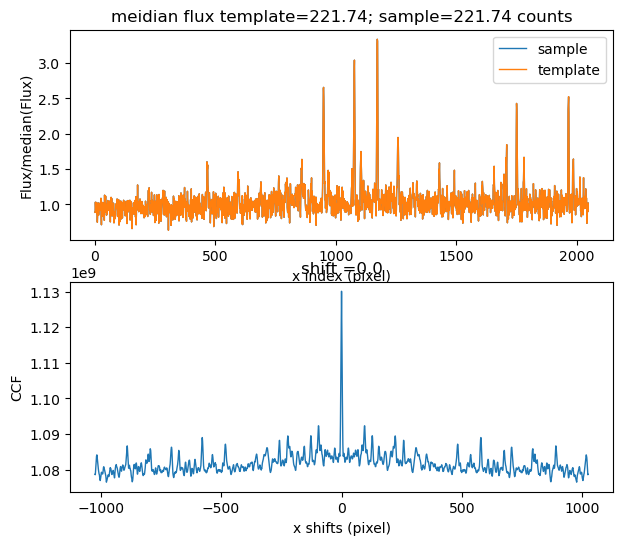

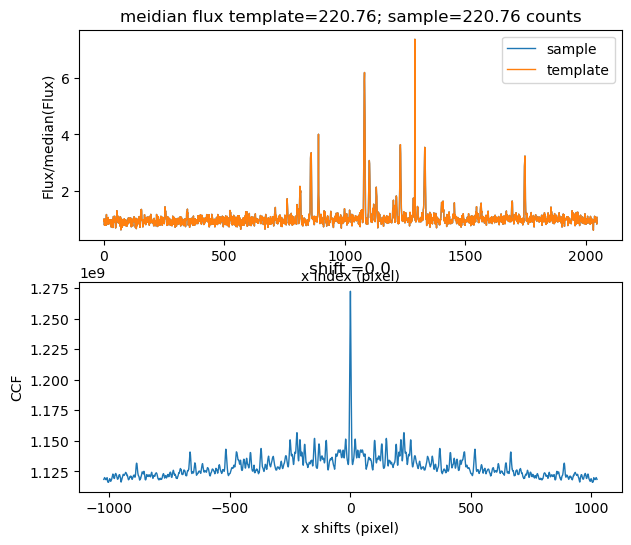

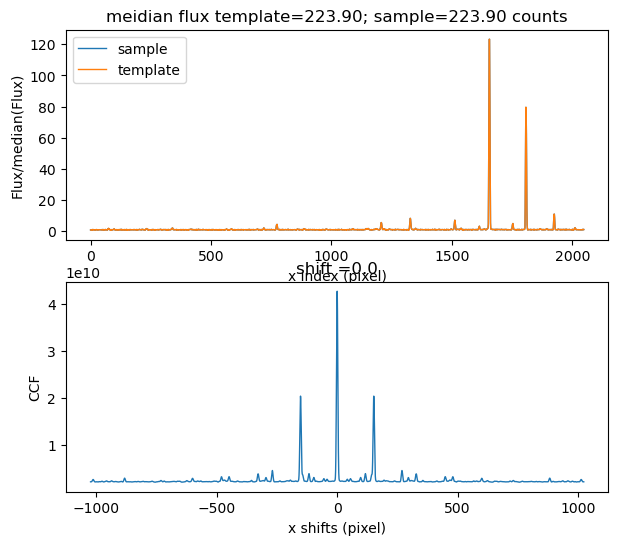

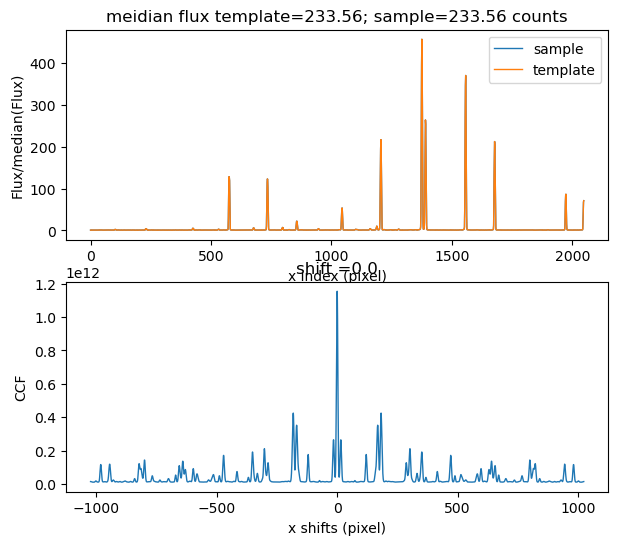

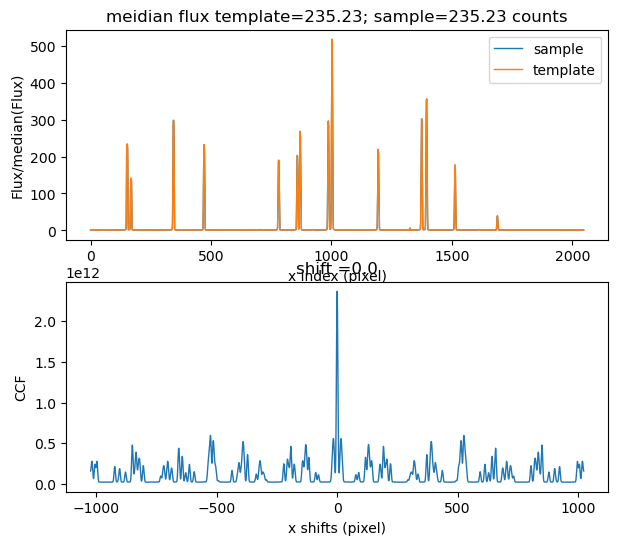

In [13]:
_order = 10
find_line = findline()
fluxes = sample['flux']
waves_init = np.zeros_like(fluxes)
xcoord = np.arange(fluxes.shape[1])
waves_template, fluxes_template = template['wave'], template['flux']
waves_sample = sample['flux']
for _order, flux in enumerate(fluxes):
    print(flux)
    flux_template = fluxes_template[_order]
    wave_template = waves_template[_order]
    x_template = np.arange(template['flux'].shape[1])
    shifts, ccf = find_line.calCCF(xcoord, flux, x_template, flux_template, show=True)
    wave_init = find_line.estimate_wave_init(xcoord, find_line.xshift, x_template, wave_template)
    waves_init[_order] = wave_init

    #fig, ax = plt.subplots(figsize = (10,6))
    #plt.title('Corrected wavelength')
    #plt.plot(wave_init, sample['flux'][_order])
    #plt.plot(template['wave'][_order], template['flux'][_order], label='template')
    #plt.legend()
    #plt.show()

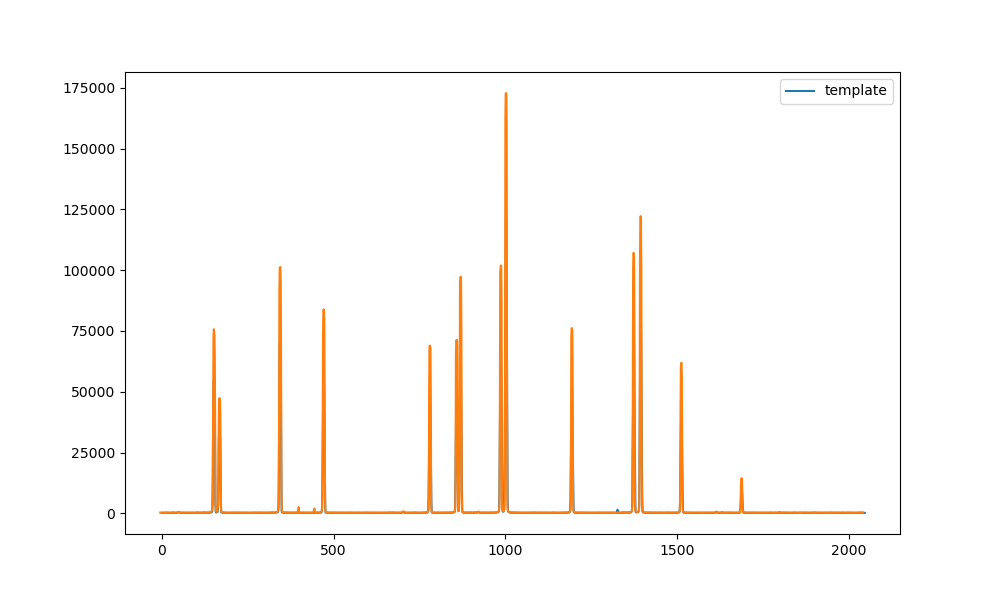

In [18]:
fig, ax = plt.subplots(figsize = (10,6))
#
plt.plot(xcoord, flux_template, label='template')
plt.plot(xcoord+find_line.xshift, flux)
plt.legend()

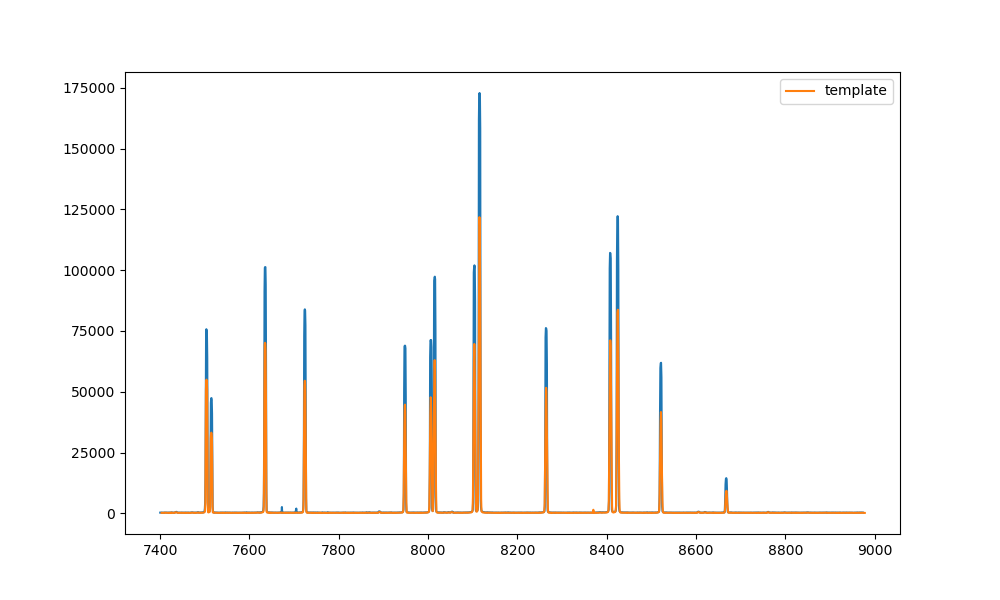

In [25]:
%matplotlib qt
fig, ax = plt.subplots(figsize = (10,6))


plt.plot(wave_init, sample['flux'][_order])
plt.plot(template['wave'][_order], template['flux'][_order], label='template')
plt.legend()

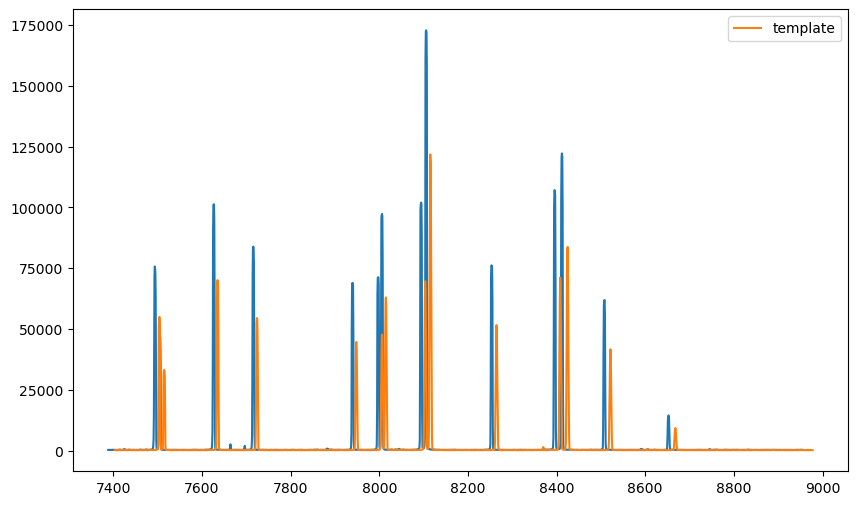

In [13]:
fig, ax = plt.subplots(figsize = (10,6))


plt.plot(sample['wave'][_order], sample['flux'][_order])
plt.plot(template['wave'][_order], template['flux'][_order], label='template')
plt.legend()